In [1]:
import xarray as xr
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

In [2]:
############################
# set up 
############################
#feature_data    = '/glade/work/hardt/ds612/2000-2013_June-Sept_CTRLradrefl_REFL.nc'
#label_data      = '/glade/work/hardt/ds612/2000-2013_June-Sept_CTRL3D_maxW.nc'

#
# v1p
#
#feature_data    = '/glade/work/hardt/ds612/2000-2013_June-Sept_scale_REFL.nc'
#label_data      = '/glade/work/hardt/ds612/2000-2013_June-Sept_scale_maxW.nc'

#
# v2p0 and v2p2 and v2p3
#
feature_data    = '/glade/work/hardt/ds612/2000-2013_June-Sept_DS128_REFL.nc'
label_data      = '/glade/work/hardt/ds612/2000-2013_June-Sept_DS128_maxW.nc'

#
# v2p1
#
#feature_data    = '/glade/work/hardt/ds612/2000-2013_June-Sept_DS128_95th_REFL.nc'
#label_data      = '/glade/work/hardt/ds612/2000-2013_June-Sept_DS128_95th_maxW.nc'

model_root      = '/glade/work/hardt/models'
model_run       = 'unet_v2p4'
predict_file    = 'predict_trained_weights_best.h5.nc'
job_number      = '5694313'
############################

In [3]:
model_run_dir = os.path.join(model_root, model_run)
predict_data = os.path.join(model_run_dir, predict_file)

In [4]:
fds = xr.open_dataset(feature_data)
f = fds.refl.values

lds = xr.open_dataset(label_data)
l = lds.maxW.values
#l[f<=0]=0

#
# Matching this data to the test data
# that went into the prediction
#

#
# v1p0
#
#f = f[7648:9568,:,:]
#l = l[7648:9568,:,:]

#
# v2p0 and v2p2 and v2p3
#
f = f[22306:27874,:,:]
l = l[22306:27874,:,:]

#
# v2p1 - 95th percentile
# 
#f = f[9762:12250,:,:]
#l = l[9762:12250,:,:]

pds = xr.open_dataset(predict_data)
p = pds.pMaxW.values
# p[p<0.5]=0

In [5]:
print(p.shape)

(5568, 128, 128, 1)


In [6]:
plt_number = 5555
fi = f[plt_number,:,:]
li = l[plt_number,:,:]
pi = p[plt_number,:,:,0]

In [7]:
print(pi.shape)

(128, 128)


0.0003360256041344994 0.015028544068420024 0.0011077474458165352 0.007426119196524831
0.0
0.02757999
0.0004871014310629107


<Figure size 432x288 with 0 Axes>

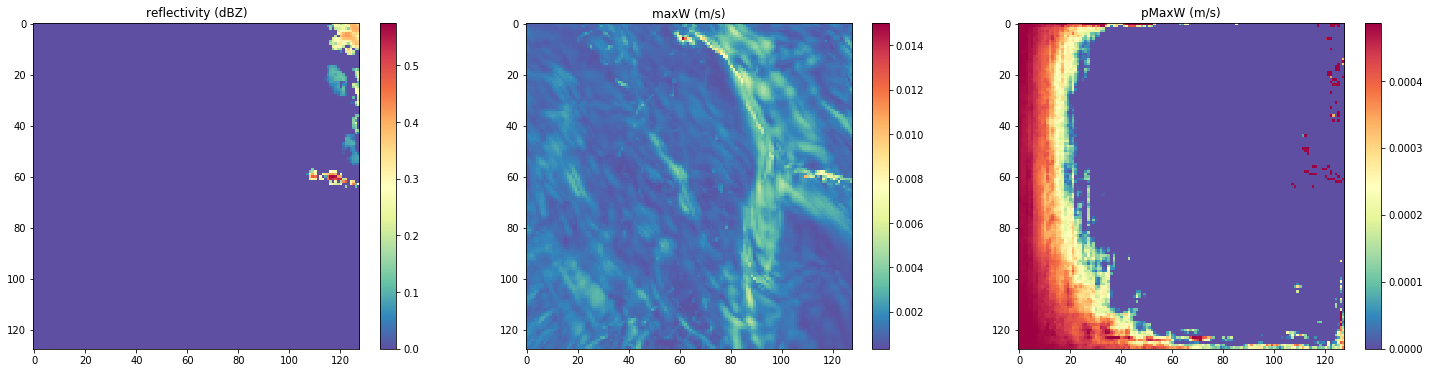

In [8]:
cmap = plt.cm.Spectral_r
plt.clf()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,6)) 

max_ref = np.amax(fi[:,:])
p_ref = np.percentile(fi[:,:], 99.9)

ref = ax1.imshow(fi, cmap=cmap)
ax1.set_title("reflectivity (dBZ)")
#ref.set_clim(vmin=0, vmax=max_ref)
ref.set_clim()
fig.colorbar(ref, ax=ax1, orientation='vertical', label='')

max_maxW = np.amax(li[:,:])
min_maxW = np.amin(li[:,:])
p_maxW = np.percentile(li[:,:], 99.9)
pmin_maxW = np.percentile(li[:,:], 35.0)
print(min_maxW, max_maxW, pmin_maxW, p_maxW)

maxW = ax2.imshow(li, cmap=cmap)
ax2.set_title("maxW (m/s)")
#maxW.set_clim(vmin=0, vmax=p_maxW)
maxW.set_clim()
fig.colorbar(maxW, ax=ax2)

min_pMaxW = np.amin(pi[:,:])
max_pMaxW = np.amax(pi[:,:])
p_pMaxW = np.percentile(pi[:,:], 99)
print(min_pMaxW)
print(max_pMaxW)
print(p_pMaxW)

pMaxW = ax3.imshow(pi, cmap=cmap)
ax3.set_title("pMaxW (m/s)")
pMaxW.set_clim(vmin=0, vmax=p_pMaxW)
#pMaxW.set_clim()
fig.colorbar(pMaxW, ax=ax3)

plt.savefig(model_run_dir + "/predict_comp_" + job_number + "_" + str(plt_number) + ".png")